In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
single_image = x_train[500]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  38, 191, 138,  24,  24, 108, 138,  34,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  70, 252, 252, 253, 252, 252, 252, 252,
        162,  88,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  51, 240, 252, 253, 240, 183, 183, 246,
        253, 252, 202, 142,   7,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  37,  98, 211, 206,   0,   0,  42,
        109, 177, 252, 252, 211,  43,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  13,  18,   0,   0,   0,
          0,   5,  54, 179, 252, 220,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  43, 241, 255,  92,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 230, 253,  92,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  68, 246, 247,  67,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 134, 252,  94,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 116, 248, 200,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         13,  97, 222, 192,  11,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  99,
        208, 227, 174,  17,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 207, 252,
        237,  88,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  80, 202,
        253, 244, 207,  80,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
         96, 252, 252, 244,  73,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  22, 199, 249, 253, 128,   9,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 118, 248, 253, 113,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 115, 253, 240,  50,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [7]:
single_image.shape

(28, 28)

In [8]:
print(y_train[500])

3


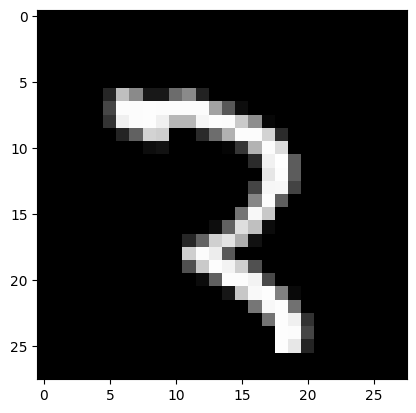

In [9]:
plt.imshow(single_image,cmap='gray')

In [10]:
y_train.shape

(60000,)

In [11]:
x_train.min()

0

In [12]:
x_train.max()

255

In [13]:
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

In [14]:
x_train_scaled.min()

0.0

In [15]:
x_train_scaled.max()

1.0

In [16]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [17]:
type(y_train_onehot)

numpy.ndarray

In [18]:
y_train_onehot.shape


(60000, 10)

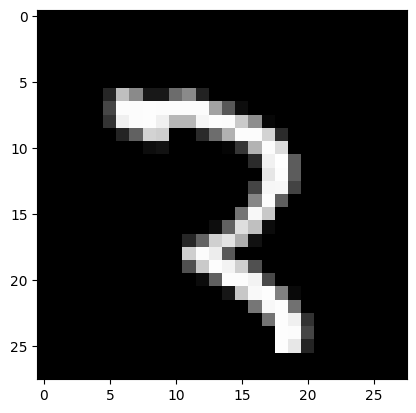

In [19]:
single_image = x_train[500]
plt.imshow(single_image,cmap='gray')

In [20]:
x_train_scaled = x_train_scaled.reshape(-1,28,28,1)
x_test_scaled = x_test_scaled.reshape(-1,28,28,1)

In [21]:
model =keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         346,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 348,906 (1.33 MB)

 Trainable params: 348,906 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
model.fit(x_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(x_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.8730 - loss: 0.4488 - val_accuracy: 0.9762 - val_loss: 0.0803
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9779 - loss: 0.0717 - val_accuracy: 0.9824 - val_loss: 0.0512
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.9864 - loss: 0.0436 - val_accuracy: 0.9831 - val_loss: 0.0500
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 72s 35ms/step - accuracy: 0.9899 - loss: 0.0326 - val_accuracy: 0.9774 - val_loss: 0.0646
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.9916 - loss: 0.0257 - val_accuracy: 0.9846 - val_loss: 0.0462


In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.936917,0.218603,0.9762,0.080307
1,0.979483,0.066846,0.9824,0.051205
2,0.985267,0.047144,0.9831,0.050019
3,0.989267,0.033939,0.9774,0.064602
4,0.991433,0.026748,0.9846,0.046208


 -SANDHIYA R


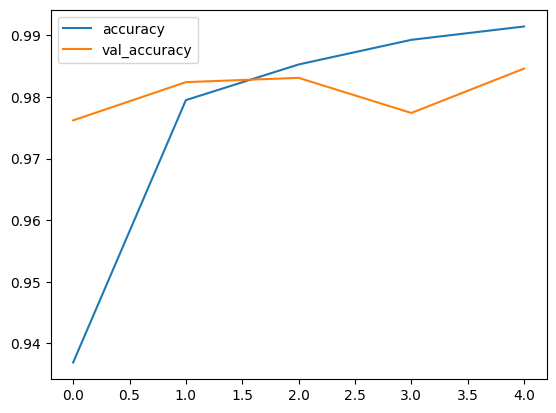

In [27]:

metrics[['accuracy','val_accuracy']].plot()
print(" -SANDHIYA R")

 -SANDHIYA R


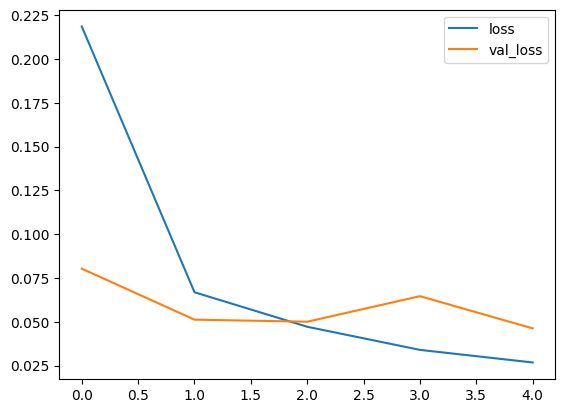

In [28]:
metrics[['loss','val_loss']].plot()
print(" -SANDHIYA R")

In [33]:
x_test_predictions = np.argmax(model.predict(x_test_scaled), axis=1)
print(confusion_matrix(y_test,x_test_predictions))
print(classification_report(y_test,x_test_predictions))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
[[ 976    0    0    0    0    0    2    0    1    1]
 [   0 1120    4    2    1    1    1    0    6    0]
 [   4    1 1016    1    2    0    2    3    2    1]
 [   0    0    2 1002    0    4    0    0    2    0]
 [   1    0    0    0  966    0    2    0    2   11]
 [   1    0    0    7    0  874    7    0    1    2]
 [   5    1    0    0    1    1  948    0    2    0]
 [   1    1    9    8    1    0    0  999    1    8]
 [   6    0    2    1    1    0    1    1  958    4]
 [   1    1    1    2    9    3    0    2    3  987]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.99     

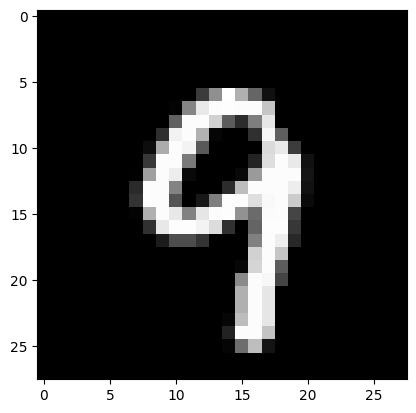

In [38]:
img = x_train[550]
type(img)
plt.imshow(img,cmap='gray')


In [39]:
img = image.load_img('image.png')
tensor_img = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(tensor_img,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [40]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)
print(x_single_prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[9]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[9]


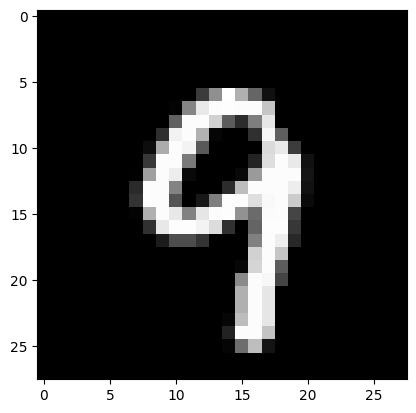

In [41]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)
print(x_single_prediction)
